## The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2020 Semester 2
-----
## Project 1: Predicting stroke with Naive Bayes and K-NN
-----
###### Student Name(s): Hongzhi Fu
###### Python version: 3.7.7
###### Student ID: 1058170
###### Submission deadline: 

This iPython notebook is a template which you will use for your Project 1 submission. 

Marking will be applied on the functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import shuffle
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('stroke_update.csv')

pos_ins = []
neg_ins = []

# split data into two parts(stroke and non-stroke)
for instance in np.array(data):
    if instance[-1] == 1:
        pos_ins.append(instance[:-1])
    else:
        neg_ins.append(instance[:-1])

# convert to numpy array
pos_ins = np.array(pos_ins)
neg_ins = np.array(neg_ins)

In [28]:
def explore_label(data):
    label_dict = {}
    for lbl in data.iloc[:, -1]:
        if lbl in label_dict.keys():
            label_dict[lbl] += 1
        else:
            label_dict[lbl] = 1
    
    # label distribution
    plt.title("label distribution")
    label_list = ['non-stroke', 'stroke']
    non_stroke = [label_dict[0]]
    stroke = [label_dict[1]]
    x = range(len(label_dict))
    bar1 = plt.bar(x=[x[0]], height=non_stroke, width=0.2, color='green', label='non-stroke')
    bar2 = plt.bar(x=[x[1]], height=stroke, width=0.2, color='red', label='stroke')
    plt.xticks([index for index in x], label_list)
    plt.xlabel('label'); plt.ylabel('# instances')
    plt.legend(loc='best')
    plt.show()
    
    return label_dict

In [32]:
def explore_numeric(pos_ins, neg_ins):

    agl_pos = pos_ins[:, 0]
    agl_neg = neg_ins[:, 0]
    bmi_pos = pos_ins[:, 1]
    bmi_neg = neg_ins[:, 1]
    age_pos = pos_ins[:, 2]
    age_neg = neg_ins[:, 2]

    # average glucose level distribution
    plt.title("average glucose level distribution over stroke and non-stroke")
    plt.hist(agl_neg, label='non-stroke')
    plt.hist(agl_pos, label='stroke')
    plt.legend(loc='best')
    plt.show()
    
    # BMI distribution
    plt.title("bmi distribution over stroke and non-stroke")
    plt.hist(bmi_neg, label='non-stroke')
    plt.hist(bmi_pos, label='stroke')
    plt.legend(loc='best')
    plt.show()
    
    # age distribution
    plt.title("age distribution over stroke and non-stroke")
    plt.hist(age_neg, label='non-stroke')
    plt.hist(age_pos, label='stroke')
    plt.legend(loc='best')
    plt.show()


In [33]:
def explore_categorical(pos_ins, neg_ins):

    gender_pos = pos_ins[:, 3]; gender_neg = neg_ins[:, 3]
    ht_pos = pos_ins[:, 4]; ht_neg = neg_ins[:, 4]
    hd_pos = pos_ins[:, 5]; hd_neg = neg_ins[:, 5]
    marry_pos = pos_ins[:, 6]; marry_neg = neg_ins[:, 6]
    wt_pos = pos_ins[:, 7]; wt_neg = neg_ins[:, 7]
    rt_pos = pos_ins[:, 8]; rt_neg = neg_ins[:, 8]
    smoke_pos = pos_ins[:, 9]; smoke_neg = neg_ins[:, 9]

    # gender distribution
    plt.title("gender distribution over stroke and non-stroke")
    label_list = ['Male', 'Female']
    non_stroke = [len([i for i in gender_neg if i == gender]) for gender in label_list]
    stroke = [len([i for i in gender_pos if i == gender]) for gender in label_list]
    x = range(len(label_list))
    bar1 = plt.bar(x=[i-0.1 for i in x], height=non_stroke, width=0.2, color='green', label='non-stroke')
    bar2 = plt.bar(x=[i+0.1 for i in x], height=stroke, width=0.2, color='red', label='stroke')
    plt.xticks([index for index in x], label_list)
    plt.xlabel('gender'); plt.ylabel('# instances')
    plt.legend(loc='best')
    plt.show()

    # hypertension distribution
    plt.title("hypertension distribution over stroke and non-stroke")
    label_list = ['Yes', 'No']
    non_stroke = [len([i for i in ht_neg if i == 1]), len([i for i in ht_neg if i == 0])]
    stroke = [len([i for i in ht_pos if i == 1]), len([i for i in ht_pos if i == 0])]
    x = range(len(label_list))
    bar1 = plt.bar(x=[i-0.1 for i in x], height=non_stroke, width=0.2, color='green', label='non-stroke')
    bar2 = plt.bar(x=[i+0.1 for i in x], height=stroke, width=0.2, color='red', label='stroke')
    plt.xticks([index for index in x], label_list)
    plt.xlabel('hypertension'); plt.ylabel('# instances')
    plt.legend(loc='best')
    plt.show()

    # heart disease distribution
    plt.title("heart disease distribution over stroke and non-stroke")
    label_list = ['Yes', 'No']
    non_stroke = [len([i for i in hd_neg if i == 1]), len([i for i in hd_neg if i == 0])]
    stroke = [len([i for i in hd_pos if i == 1]), len([i for i in hd_pos if i == 0])]
    x = range(len(label_list))
    bar1 = plt.bar(x=[i-0.1 for i in x], height=non_stroke, width=0.2, color='green', label='non-stroke')
    bar2 = plt.bar(x=[i+0.1 for i in x], height=stroke, width=0.2, color='red', label='stroke')
    plt.xticks([index for index in x], label_list)
    plt.xlabel('heart disease'); plt.ylabel('# instances')
    plt.legend(loc='best')
    plt.show()

    # marry status distribution
    plt.title("marry status distribution over stroke and non-stroke")
    label_list = ['Yes', 'No']
    non_stroke = [len([i for i in marry_neg if i == status]) for status in label_list]
    stroke = [len([i for i in marry_pos if i == status]) for status in label_list]
    x = range(len(label_list))
    bar1 = plt.bar(x=[i-0.1 for i in x], height=non_stroke, width=0.2, color='green', label='non-stroke')
    bar2 = plt.bar(x=[i+0.1 for i in x], height=stroke, width=0.2, color='red', label='stroke')
    plt.xticks([index for index in x], label_list)
    plt.xlabel('marry status'); plt.ylabel('# instances')
    plt.legend(loc='best')
    plt.show()

    # work type distribution
    plt.title("work type distribution over stroke and non-stroke")
    label_list = ['Govt_job', 'Private', 'Self-employed', 'children', 'Never_worked']
    non_stroke = [len([i for i in wt_neg if i == work]) for work in label_list]
    stroke = [len([i for i in wt_pos if i == work]) for work in label_list]
    x = range(len(label_list))
    bar1 = plt.bar(x=[i-0.1 for i in x], height=non_stroke, width=0.2, color='green', label='non-stroke')
    bar2 = plt.bar(x=[i+0.1 for i in x], height=stroke, width=0.2, color='red', label='stroke')
    plt.xticks([index for index in x], label_list)
    plt.xlabel('work type'); plt.ylabel('# instances')
    plt.legend(loc='best')
    plt.show()

    # residence type distribution
    plt.title("residence type distribution over stroke and non-stroke")
    label_list = ['Rural', 'Urban']
    non_stroke = [len([i for i in rt_neg if i == residence]) for residence in label_list]
    stroke = [len([i for i in rt_pos if i == residence]) for residence in label_list]
    x = range(len(label_list))
    bar1 = plt.bar(x=[i-0.1 for i in x], height=non_stroke, width=0.2, color='green', label='non-stroke')
    bar2 = plt.bar(x=[i+0.1 for i in x], height=stroke, width=0.2, color='red', label='stroke')
    plt.xticks([index for index in x], label_list)
    plt.xlabel('residence type'); plt.ylabel('# instances')
    plt.legend(loc='best')
    plt.show()

    # smoking status distribution
    plt.title("smoking status distribution over stroke and non-stroke")
    label_list = ['formerly smoked', 'never smoked', 'smokes']
    non_stroke = [len([i for i in smoke_neg if i == status]) for status in label_list]
    stroke = [len([i for i in smoke_pos if i == status]) for status in label_list]
    x = range(len(label_list))
    bar1 = plt.bar(x=[i-0.1 for i in x], height=non_stroke, width=0.2, color='green', label='non-stroke')
    bar2 = plt.bar(x=[i+0.1 for i in x], height=stroke, width=0.2, color='red', label='stroke')
    plt.xticks([index for index in x], label_list)
    plt.xlabel('smoking status'); plt.ylabel('# instances')
    plt.legend(loc='best')
    plt.show()


In [187]:
# This function should transform data into a usable format
def preprocess(data):
    return data.sample(frac=1)  # shuffle dataset randomly
data = preprocess(data)

In [134]:
# This function should split a data set into a training set and hold-out test set
def split_data(data, ratio):
    m = len(data)
    train_set = data.iloc[:int(m*ratio)]
    test_set = data.iloc[int(m*ratio):]
    return train_set, test_set

train_set, test_set = split_data(data, 0.7)
X_train, y_train = train_set.iloc[:, :-1], train_set.iloc[:, -1]
X_test, y_test = test_set.iloc[:, :-1], test_set.iloc[:, -1]

In [77]:
# This function should build a supervised NB model
def p_y(y):
    class_counter = [0] * len(set(y))
    for cls in y:
        class_counter[cls] += 1
    return class_counter

def p_xy(x, y, alpha):
    prob_dict = {cls:{} for cls in y}
    # init dict (over classes) of dict (over features) of dict (over value counts)
    for c in prob_dict.keys():
        for f in range(len(x[0])):
            prob_dict[c][f] = {}
            if f < 3:
                prob_dict[c][f] = {'mu': 0, 'sigma': 0, 'data': []}  # numerical data
            else:
                vals = set([ins[f] for ins in x])
                prob_dict[c][f] = {v: alpha for v in vals}  # categorical data

    # fill in dictionary
    for idx, _ in enumerate(x):
        for fidx, _ in enumerate(x[idx]):
            if fidx < 3:
                prob_dict[y[idx]][fidx]['data'].append(x[idx][fidx])
            else:
                prob_dict[y[idx]][fidx][x[idx][fidx]] += 1

    # calculate mean and variance of numerical data and normalize categorical data plus Laplace smoothing
    for cls in prob_dict.keys():
        for f in prob_dict[cls].keys():
            if f < 3:
                prob_dict[cls][f]['mu'] = np.mean(prob_dict[cls][f]['data'])
                prob_dict[cls][f]['sigma'] = np.var(prob_dict[cls][f]['data'])
                prob_dict[cls][f].pop('data')  # for space saving
            else:
                for val in prob_dict[cls][f].keys():
                    prob_dict[cls][f][val] = prob_dict[cls][f][val] / (p_y(y)[cls] + len(prob_dict[cls][f])*alpha)
    return prob_dict

def train(X_train, y_train):
    py = p_y(np.array(y_train))
    pxy = p_xy(np.array(X_train), np.array(y_train), alpha=1)
    return (py, pxy)
prior, likelihood = train(X_train, y_train)

In [78]:
# This function should predict the class for an instance or a set of instances, based on a trained model 
def compute_gaussian(mu, sigma, x):
    return math.exp(-(x - mu)**2 / (2*sigma)) / (math.sqrt(2*math.pi*sigma))
def predict(X_test, prior, likelihood):
    y_pred = []
    for i in range(len(X_test)):
        class_prob = []
        for cls in range(len(prior)):
            prob = math.log(prior[cls] / sum(prior))  # prior probability
            for fidx, f in enumerate(X_test[i]):
                if fidx < 3:
                    mu, sigma = likelihood[cls][fidx]['mu'], likelihood[cls][fidx]['sigma']
                    prob += math.log(compute_gaussian(mu, sigma, X_test[i][fidx]))  # numerical posterior
                else:
                    prob += math.log(likelihood[cls][fidx][f])  # categorical posterior
            class_prob.append(prob)
        y_pred.append((class_prob, np.argmax(class_prob)))
    return y_pred

y_pred = predict(np.array(X_test), prior, likelihood)

In [79]:
# This function should evaluate a set of predictions in terms of metrics
def evaluate(true, pred):
    CM = metrics.confusion_matrix(true, pred)
    Acc = metrics.accuracy_score(true, pred)
    precf1 = metrics.precision_recall_fscore_support(true, pred)
    return CM, Acc, precf1

## Questions (you may respond in a cell or cells below):

You should respond to questions 1-4. In question 2 (b) you can choose between two options. A response to a question should take about 100--200 words, and make reference to the data wherever possible.

### Question 1: Data exploration

- a) Explore the data and summarise different aspects of the data. Can you see any interesting characteristic in features, classes or categories? What is the main issue with the data? Considering the issue, how would the Naive Bayes classifier work on this data? Discuss your answer based on the Naive Bayes' formulation.
- b) Is accuracy an appropriate metric to evaluate the models created for this data? Justify your answer. Explain which metric(s) would be more appropriate, and contrast their utility against accuracy. [no programming required]



- (a) First, I explore the distribution over labels and count the number of positive instances and negative instances resprectively.

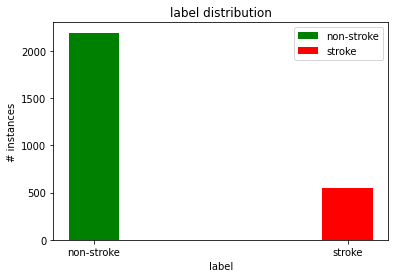

We have 548 positive instances and 2192 negative instances.


In [31]:
explore_label(data)
print("We have %d positive instances and %d negative instances." % (class_dict[1], class_dict[0]))

For numerical data(the first three attributes), we plot data distribution over two class labels, stroke and non-stroke by a function `explore_numeric`.

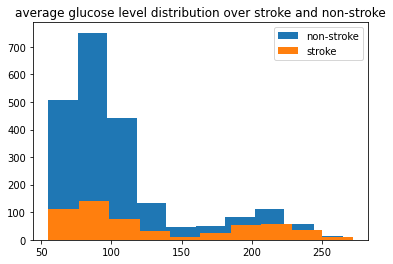

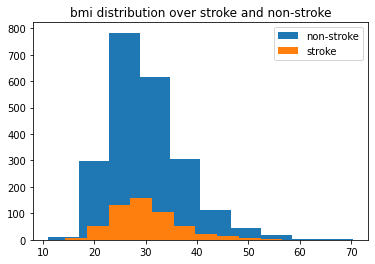

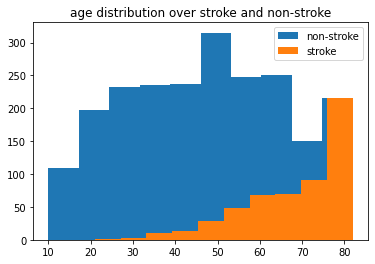

In [34]:
explore_numeric(pos_ins, neg_ins)

As shown in the above three histograms, we can intuitively observe that average glucose level shares the same distribution over stroke and non-stroke, and so does BMI. Conversely, the age of people who does not have a stroke are equally distributed, while most of stroke patients are aged between 70 to 80, and the elder people are, the more likely they have a stroke. Hence, we can reach a conclusion that age is one of the important factors what causes people have a stroke.

For categorical data, we simply count the number of possible value for each attribute of each class label and use a bar graph to plot their distributions, which is implemented by method `explore_categorical`.

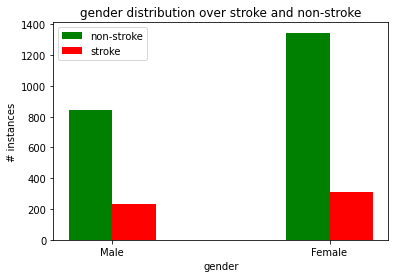

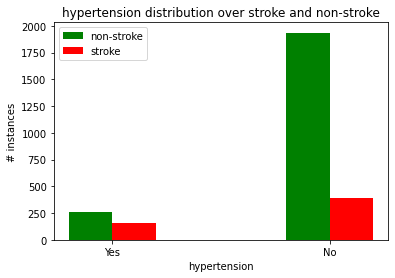

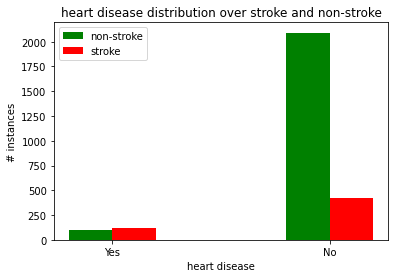

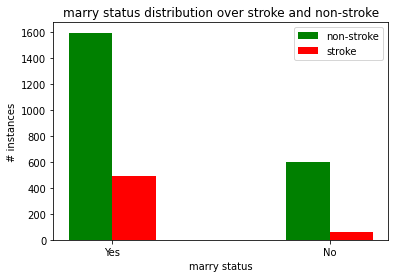

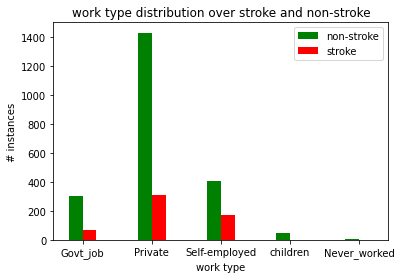

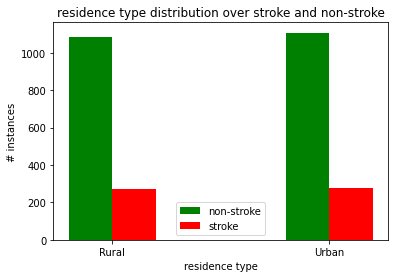

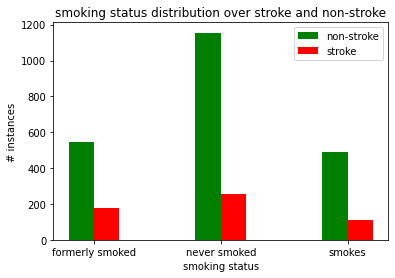

In [35]:
explore_categorical(pos_ins, neg_ins)

The illustrated seven bar graphs give us information as follows:
- 1. Male is prone to have a stroke compared with female, which is a potential effecting factor. 
- 2. It is obvious that having hypertension and heart disease are substantially more likely to be a stroke patient. 
- 3. Most stroke cases come from people who get married.
- 4. In terms of working type, self-employed has the highest ratio, but children-related work and unemployed people hardly have stroke cases.
- 5. Whether people live in urban area or rural area cannot affect them having a stroke.
- 6. Formerly smoked or currently smoked has an impact on having a stroke.

The main issue of this dataset is all previous 2192 instances' label is 0 and the rest of 548 instances is labeled as 1, so when splitting it into training set and test set without shuffling, we can split a training set with all instances negative and all test set instances positive. The consequence is the learning algorithm(Naive Bayes) cannot learn the differences between positive examples and negative examples based on attributes given. To handle it, we need to `preprocess` raw data which randomly shuffles dataset, thus both training set and test set has the same prior distribution(80% negative vs 20% positive) over label. The Naive Bayes classifer splits attributes into independent ones and calculate each conditional probability of each possible value of each attribute given a specific label and use these paramaters to predict the test data the classifer has never seen.

- (b) Accuracy is not an appropriate metrics for this dataset, since the dataset is biased and imbalance. The statistics shows that there are 548 stroke instances while the rest 2192 instances does not have a stroke, which constitutes 80% of total instances. Thus, we can naively predict all instances not having a stroke and achieve 80% accuracy, which is a desiable result. However, this classifier does not classify any stroke instances at all, which indicates accuracy is not an appropriate metrics. Alternative metrics are F1-score, which needs to compute precision and recall. Precision measures the proportion of correctly labeled positive instances over all instances predicted positive, and recall tells us what proportion of correctly classified positive instances over all instances that are actually positive.

### Question 2: Naive Bayes concepts and formulation

- a) Explain the independence assumption underlying Naive Bayes. What are the advantages and disadvantages of this assumption? Elaborate your answers using the features of the provided data. [no programming required]
- b) Implement the Naive Bayes classifier. You need to decide how you are going to apply Naive Bayes for nominal and numeric attributes. You can combine both Gaussian and Categorical Naive Bayes (option 1) or just using Categorical Naive Bayes (option 2). Explain your decision. For Categorical Naive Bayes, you can choose either epsilon or Laplace smoothing for this calculation. Evaluate the classifier using accuracy and appropriate metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Explain the difference between epsilon and Laplace smoothing. [no programming required]

- (a) The independence assumption of Naive Bayes is the probability of any pair of attributes of $x$ given the class label $y$ is independent. In other words, the knowledge of $p(x_i|y)$ will have no effect on our belief of $p(x_j|y)$, for  $0 < i,j\leq n$. The biggest advantage is instead of computing the whole joint probability of $p(x_1, x_2, \cdot\cdot\cdot, x_n|y)$, which is infeasible to compute, we divide it into $n$ independent parts such that $\prod_{i=1}^n p(x_i|y)$. In this dataset, we assume features are independent with each other, e.g. the probability of level of glucose is independent with age or work type. However, if features are closely related, it turns out the assumption cannot be applied thus the performance of classifier is compromised. The elder people are prone to have hypertension or heart disease, which suggests features are correlated in reality and may influence the final accuracy.

- (b) The method dealing with nominal and numeric attributes is the combination of Gaussian and Categorical Naive Bayes. The reason is for a large dataset, the distribution of continuous numerical data can be regarded as Gaussian, so in this case, when training the dataset, the parameter we need to calculate is mean $\mu$ and variance $\sigma^2$, while when a test instance is input, the probability of that attribute is the value of probability density function evaluating $x_i$. For categorical Naive Bayes, I choose Laplace smoothing to handle zero probability. The performance comparison of Naive Bayes and Zero-R baseline:

In [129]:
CM, Acc, precf1 = evaluate(np.array(y_test), [pred[1] for pred in y_pred])
print("Naive Classifier:")
print("Confusion Matrix:\n{}\naccuracy: {}\nprecision: {}\nrecall: {}\nF1: {}\n".format(CM, 
                                                Acc,
                                                precf1[0],
                                                precf1[1],
                                                precf1[2]))
CM, Acc, precf1 = evaluate(np.array(y_test), [0]*len(y_pred))
print("Zero-R Baseline:")
print("Confusion Matrix:\n{}\naccuracy: {}\nprecision: {}\nrecall: {}\nF1: {}".format(CM, 
                                                Acc,
                                                precf1[0],
                                                precf1[1],
                                                precf1[2]))

Naive Classifier:
Confusion Matrix:
[[556 108]
 [ 82  77]]
accuracy: 0.7691373025516404
precision: [0.87147335 0.41621622]
recall: [0.8373494  0.48427673]
F1: [0.85407066 0.44767442]

Zero-R Baseline:
Confusion Matrix:
[[664   0]
 [159   0]]
accuracy: 0.8068043742405833
precision: [0.80680437 0.        ]
recall: [1. 0.]
F1: [0.8930733 0.       ]


For Zero-R baseline, we simply label all instances as the majority of classes, which is 0, then the model achieves 80% of accuracy, which is slightly higher than Naive Bayes classifier. However, the precision and recall for true label is only 0, due to the lack of labels predicted to 1. Therefore, the F1 score for Zero-R baseline is also 0.

- (c) Epsilon smoothing is just replace each zero probability with a smoothing term $\epsilon$, while the formula of Laplace smoothing is as follows: $p(x|y) = \frac{\alpha+count(x,y)}{M\alpha+count(x,y)}$, where $\alpha$ is a hyperparameter which is typically evaluated to 1, and $M$ is the number of possible values of an attribute.

### Question 3: Model Comparison
- a) Implement the K-NN classifier, and find the optimal value for K. 
- b) Based on the obtained value for K in question 4 (a), evaluate the classifier using accuracy and chosen metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Compare the classifiers (Naive Bayes and K-NN) based on metrics' results. Provide a comparatory discussion on the results. [no programming required]

In [302]:
def preprocess_knn(data):
    # discretize numerical attributes
    data['avg_glucose_level'] = pd.cut(data['avg_glucose_level'], bins=[50, 150, 300], labels=['Low', 'High'])
    data['bmi'] = pd.cut(data['bmi'], bins=[10, 20, 40, 80], labels=['Low', 'Medium', 'High'])
    data['age'] = pd.cut(data['age'], bins=[0, 25, 60, 90], labels=['Young', 'Mid-age', 'Elder'])

    # map string values one-hot values
    data = pd.get_dummies(data)
    
    return data.sample(frac=1)  # shuffle dataset randomly
data = preprocess_knn(data)

In [ ]:
# split data
train_set, test_set = split_data(data, 0.7)
X_train, y_train = train_set.iloc[:, :-1], train_set.iloc[:, -1]
X_test, y_test = test_set.iloc[:, :-1], test_set.iloc[:, -1]

In [303]:
def find_opt_k(max_k):
    optimal_K = None  # initialization
    max_acc = 0  # temporary maximum value of accuracy
    for k in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn.fit(X_train, y_train)
        y_preds = knn.predict(X_test)

        acc = evaluate(y_test, y_preds)[1]
        if acc > max_acc:
            max_acc = acc
            optimal_K = k
    return optimal_K

print("The optimal value for K is %d." %find_opt_k(20))

The optimal value for K is 3.


- (a) The optimal value for K is 3 based on the execution of the above code. The intuition is pretty simple. First, we need set the upper bound of number of neighbours we consider, in this case we choose 20, then for each iteration, we evaluate the accuracy of the corresponding value of k and update the variable `optimal_K` we initialized at the beginning if the current accracy `acc` is larger than terporary maximum value of accuracy `max_acc`. When the `for` loop is over, we return the optimal value of k which is 3.

In [305]:
CM, Acc, precf1 = evaluate(np.array(y_test), y_preds)
print("KNN Classifier:")
print("Confusion Matrix:\n{}\naccuracy: {}\nprecision: {}\nrecall: {}\nF1: {}\n".format(CM, 
                                                Acc,
                                                precf1[0],
                                                precf1[1],
                                                precf1[2]))
CM, Acc, precf1 = evaluate(np.array(y_test), [0]*len(y_preds))
print("Zero-R Baseline:")
print("Confusion Matrix:\n{}\naccuracy: {}\nprecision: {}\nrecall: {}\nF1: {}".format(CM, 
                                                Acc,
                                                precf1[0],
                                                precf1[1],
                                                precf1[2]))

KNN Classifier:
Confusion Matrix:
[[619  15]
 [ 96  93]]
accuracy: 0.8651275820170109
precision: [0.86573427 0.86111111]
recall: [0.97634069 0.49206349]
F1: [0.91771683 0.62626263]

Zero-R Baseline:
Confusion Matrix:
[[634   0]
 [189   0]]
accuracy: 0.7703523693803159
precision: [0.77035237 0.        ]
recall: [1. 0.]
F1: [0.8702814 0.       ]


- (b) The optimal K for KNN classifier achieves about 89% accuracy, and all other metrics(precision, recall and F1 score) are also higher than Naive Bayes classifier. In contrast, when applying Zero-R baseline classifier which always predicts the majority of classes, the accuracy is not bad, but other metrics are biased, which means the precision, recall and F1 score for positive instances is high but 0 for negative instances.

- (c) The overall accuracy of KNN classifier is better than that of Naive Bayes, with about 10% margin. In terms of precision, the positive instances for both two classifiers achieve the same proportion, while the negative instances have a large gap(41.6% of Naive Bayes and 86.1% of KNN); recall metrics for KNN is fairly remarkable compared with Naive Bayes in all instances, in particular positive ones, with about 15% of outperformance. Hence, F1 score for KNN is also better than Naive Bayes for both positive and negative instances.